<a href="https://colab.research.google.com/github/raquelneia/raquelneia/blob/main/treianmentoPythonBasicoDicionariosSplitsForReplace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Gerando a matriz Assembly x Orthogroups

In [ ]:
#!pip install re
import re
dict_ptn_og = {} # dicionario, chave ptn e valor OG
dict_all_assemblies = {} # dicitonario, chaves são os assemblies, valor 1 para todos
dict_all_og = {} # dicitonario, chaves são os OG, valor 1 para todos
dict_og_assembly={} # par de 'og+assembly' vai ser um valor único
with open ('/content/drive/MyDrive/RaquelSerratiaDBdrive/Orthogroups/Orthogroups.txt') as file: # abre um arquivo
#with open ('/content/teste') as file: # abre um arquivo
  lines = file.readlines() #
  for line in lines: # iterar cada linha da lista de linhas do arquivo
    line = line.rstrip('\n') # retirar a quebra de linha \n
    o=line.split(': ') # separa a linha em duas partes e retorna em uma lista o
    og=o[0] # armazena o primeiro elemento (OG)
    del o[0] # deleto o primeio elemento da lista
    o=str(o).rstrip("']")
    o = o.replace("['","")
    list_assemblies_ptns = re.split('[| ]',o) # cria uma lista mista com valores de assemblies e proteínas intercalados (impares e pares)
    for p in list_assemblies_ptns[1::2]: # itera a lista mista pegando todos elementos pares (proteínas) e não os elementos impares (assemblies)
      dict_ptn_og[p]=og   # dicionario com proteína com chave e o OG que ela percente como valor
    for a in list_assemblies_ptns[::2]: # itera a lista mista pegando todos elementos impares (assemblies) e não os elementos pares (proteinas)
      dict_all_assemblies[a]=1  # dicionario com todos os assemblies e valor igual a 1
      dict_all_og[og]=1 # dicionario com todos os OGs
      dict_og_assembly[(og,a)]=1 # o par de 'og+assembly' será uma tupla que tem um valor único
     
    
 #Matriz
import sys

orig_stdout = sys.stdout
f = open('matriz_gcf_og.txt', 'w')
sys.stdout = f

for o in dict_all_og:
  print("\t", o, end='')
print()

for a in dict_all_assemblies:
  print(a, end='')
  for o in dict_all_og:
    key=(o,a)
    if key in dict_og_assembly:
      print("\t","1",end='')
    else:
      print("\t","0",end='')
  print()  
sys.stdout = orig_stdout
f.close()

Gerando a matriz com assembly_accession e ptns:

In [105]:
#!pip install re
import re
dict_ptn_og = {} # dicionario, chave ptn e valor OG
dict_all_assemblies = {} # dicitonario, chaves são os assemblies, valor 1 para todos
dict_all_og = {} # dicitonario, chaves são os OG, valor 1 para todos
dict_og_assembly={} # par de 'og+assembly' vai ser um valor único
dict_all_ptn={}
dict_a_ptn={}
with open ('/content/drive/MyDrive/RaquelSerratiaDBdrive/Orthogroups/Orthogroups.txt') as file: # abre um arquivo
#with open ('/content/teste') as file: # abre um arquivo
  lines = file.readlines() #
  for line in lines: # iterar cada linha da lista de linhas do arquivo
    line = line.rstrip('\n') # retirar a quebra de linha \n
    o=line.split(': ') # separa a linha em duas partes e retorna em uma lista o
    og=o[0] # armazena o primeiro elemento (OG)
    del o[0] # deleto o primeio elemento da lista
    o=str(o).rstrip("']")
    o = o.replace("['","")
    list_assemblies_ptns = re.split('[| ]',o) # cria uma lista mista com valores de assemblies e proteínas intercalados (impares e pares)
    for p in list_assemblies_ptns[1::2]: # itera a lista mista pegando todos elementos pares (proteínas) e não os elementos impares (assemblies)
      dict_ptn_og[p]=og   # dicionario com proteína com chave e o OG que ela percente como valor
    for a in list_assemblies_ptns[::2]: # itera a lista mista pegando todos elementos impares (assemblies) e não os elementos pares (proteinas)
      dict_all_assemblies[a]=1  # dicionario com todos os assemblies e valor igual a 1
      dict_all_og[og]=1 # dicionario com todos os OGs
      dict_og_assembly[(og,a)]=1 # o par de 'og+assembly' será uma tupla que tem um valor único
      dict_all_ptn[p]=1
      dict_a_ptn[(a,p)]=1

 #Matriz
import sys

orig_stdout = sys.stdout
f = open('matriz_assemblies_ptn.txt', 'w') #ATenção! o path esta incompleta para não sobescrever o arquivo já criado, ma sinicalmente era /content/drive/MyDrive/colab/arg_ranker/matriz_assemblies_ptn.txt
sys.stdout = f


for p in dict_all_ptn:
  print("\t", p, end='')
print()

for a in dict_all_assemblies:
  print(a, end='')
  for p in dict_all_ptn:
    key=(a,p)
    if key in dict_a_ptn:
      print("\t","1",end='')
    else:
      print("\t","0",end='')
  print()  
sys.stdout = orig_stdout
f.close()

In [3]:
df_matriz = pd.read_table("/content/drive/MyDrive/RaquelSerratiaDBdrive/Orthogroups/matriz_gcf_og.txt")
#df_matriz

In [4]:
df_matriz.rename(columns={'Unnamed: 0': 'assembly_accession'}, inplace=True)
#df_matriz

In [5]:
df_matriz_assemblies_ptn = pd.read_table("/content/drive/MyDrive/RaquelSerratiaDBdrive/arg_ranker/matriz_assemblies_ptn.txt")
#df_matriz_assemblies_ptn

In [6]:
df_matriz_assemblies_ptn.rename(columns={'Unnamed: 0': 'assembly_accession'}, inplace=True)

Pegando o nome dos agrupamentos e o assembly_acession:

In [ ]:
#defindo um dataframe para que possamos selecionar as colunas para o dict
df_refseq_SAM = pd.read_table('/content/drive/MyDrive/RaquelSerratiaDBdrive/assembly_summary_refseq.SAMN.Serratia.header.txt')
df_refseq_SAM.rename(columns={'# assembly_accession': 'assembly_accession'}, inplace=True)
#associando as cores à cada agrupamento (lembrar que removemos o non-pathogens do diretório)
#script para criarmos o template a ser usado no iTol
#criando uma lista de cores com seu nome e hexadecimal
dict_cores= {'#FF0000': 'red' ,'#0000FF': 'blue','#800080':'purple', '#FFFF00':'yellow', '#FF00FF':'magenta', '#800000':'maroon', '#808080':'gray', '#008080':'teal'} #red, blue, purple, yellow, magenta, maroon, gray, teal
lista_cores = list(dict_cores.keys())
#criando um contador para que a cada 'for' uma cor seja adicionada ao agrupamento
contador = 0
dict_GCF = df_refseq_SAM.set_index('assembly_accession')['biosample'].to_dict()
invertido_dict_GCF = { dict_GCF[k]:k for k in dict_GCF}
import glob
import os
import sys
#abrindo todos os arquivos desse path que contem nossos agrupamentos
path = '/content/drive/MyDrive/RaquelSerratiaDBdrive/arqhhuivos_email/'
for filename in glob.glob(os.path.join(path, '*list_email.txt')):
  contador += 1
  with open(os.path.join(os.getcwd(), filename), 'r') as f: 
    dados = f.read().splitlines()
    for linha in dados:
        GCF = [k for k,v in dict_GCF.items() if v == linha]
        listToStr = ' '.join(map(str, GCF))
#ao usarmos + ao invés de , temos um resultado do print sem espaçamento
        print(listToStr +','+filename, file=open("/content/drive/MyDrive/RaquelSerratiaDBdrive/arquivos_email/assembly_name", "a"))
        

In [ ]:
#Transformando path para apenas o nome do agrupamento
import re 
textfile = open('/content/drive/MyDrive/RaquelSerratiaDBdrive/arquivos_email/assembly_name', 'r')
filetext = textfile.read()
textfile.close() 
#(GCF.[0-9]*.[0-9])(_[^\:]+)', r'\1
match = re.sub(r'(/content/drive/MyDrive/RaquelSerratiaDBdrive/arquivos_email/+)([a-zA-Z-]+)(_list_email\.txt+)', r'\2', filetext)
print(match, file=open("/content/drive/MyDrive/RaquelSerratiaDBdrive/arquivos_email/assemblies_names.txt", "a"))

In [7]:
header_names = ['assembly_accession', 'groups']
df_assemblies_names= pd.read_csv("/content/drive/MyDrive/RaquelSerratiaDBdrive/arquivos_email/assemblies_names.txt", names=header_names)
df_assemblies_names


,assembly_accession,groups
0,GCF_000257645.1,nematodes
1,GCF_000738535.1,nematodes
2,GCF_000738675.1,nematodes
3,GCF_000747565.1,nematodes
4,GCF_000214805.1,non-clinical
...,...,...
311,GCF_013426135.1,clinical
312,GCF_015645305.1,clinical
313,GCF_015666185.1,clinical
314,GCF_017142405.1,clinical


In [8]:
from functools import reduce
dfs = [df_assemblies_names,df_matriz, df_matriz_assemblies_ptn]
df_final_matriz = reduce(lambda left,right: pd.merge(left,right,on='assembly_accession'), dfs)
df_final_matriz

,assembly_accession,groups,OG0000000,OG0000001,OG0000002,OG0000003,OG0000004,OG0000005,OG0000006,OG0000007,OG0000008,OG0000009,OG0000010,OG0000011,OG0000012,OG0000013,OG0000014,OG0000015,OG0000016,OG0000017,OG0000018,OG0000019,OG0000020,OG0000021,OG0000022,OG0000023,OG0000024,OG0000025,OG0000026,OG0000027,OG0000028,OG0000029,OG0000030,OG0000031,OG0000032,OG0000033,OG0000034,OG0000035,OG0000036,OG0000037,...,WP_182264740.1,WP_209333063.1,WP_077271248.1,WP_129258707.1,WP_212556345.1,WP_212556354.1,WP_212556506.1,WP_212556593.1,WP_212556611.1,WP_212556641.1,WP_212556700.1,WP_212556813.1,WP_212557126.1,WP_212557283.1,WP_212557330.1,WP_212557425.1,WP_212557686.1,WP_212557687.1,WP_212558020.1,WP_212558113.1,WP_212558207.1,WP_212558215.1,WP_212558435.1,WP_212558563.1,WP_212558730.1,WP_212558796.1,WP_212558797.1,WP_212559173.1,WP_212559351.1,WP_212559429.1,WP_212559458.1,WP_212559634.1,WP_212559664.1,WP_212559675.1,WP_212559676.1,WP_212559677.1,WP_212559679.1,WP_212559874.1,WP_212559901.1,WP_212560188.1
0,GCF_000257645.1,nematodes,0,0,0,0,0,0,1,0,0,1,1,1,1,1,0,0,1,1,0,1,0,0,1,1,1,1,1,1,0,1,0,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,GCF_000738535.1,nematodes,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,GCF_000738675.1,nematodes,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,GCF_000747565.1,nematodes,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,GCF_000214805.1,non-clinical,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,GCF_013426135.1,clinical,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
312,GCF_015645305.1,clinical,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
313,GCF_015666185.1,clinical,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
314,GCF_017142405.1,clinical,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_final_matriz.set_index(keys='assembly_accession')

,groups,OG0000000,OG0000001,OG0000002,OG0000003,OG0000004,OG0000005,OG0000006,OG0000007,OG0000008,OG0000009,OG0000010,OG0000011,OG0000012,OG0000013,OG0000014,OG0000015,OG0000016,OG0000017,OG0000018,OG0000019,OG0000020,OG0000021,OG0000022,OG0000023,OG0000024,OG0000025,OG0000026,OG0000027,OG0000028,OG0000029,OG0000030,OG0000031,OG0000032,OG0000033,OG0000034,OG0000035,OG0000036,OG0000037,OG0000038,...,WP_182264740.1,WP_209333063.1,WP_077271248.1,WP_129258707.1,WP_212556345.1,WP_212556354.1,WP_212556506.1,WP_212556593.1,WP_212556611.1,WP_212556641.1,WP_212556700.1,WP_212556813.1,WP_212557126.1,WP_212557283.1,WP_212557330.1,WP_212557425.1,WP_212557686.1,WP_212557687.1,WP_212558020.1,WP_212558113.1,WP_212558207.1,WP_212558215.1,WP_212558435.1,WP_212558563.1,WP_212558730.1,WP_212558796.1,WP_212558797.1,WP_212559173.1,WP_212559351.1,WP_212559429.1,WP_212559458.1,WP_212559634.1,WP_212559664.1,WP_212559675.1,WP_212559676.1,WP_212559677.1,WP_212559679.1,WP_212559874.1,WP_212559901.1,WP_212560188.1
assembly_accession,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GCF_000257645.1,nematodes,0,0,0,0,0,0,1,0,0,1,1,1,1,1,0,0,1,1,0,1,0,0,1,1,1,1,1,1,0,1,0,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
GCF_000738535.1,nematodes,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
GCF_000738675.1,nematodes,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
GCF_000747565.1,nematodes,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
GCF_000214805.1,non-clinical,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCF_013426135.1,clinical,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
GCF_015645305.1,clinical,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
GCF_015666185.1,clinical,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
df_blast = pd.read_table('/content/drive/MyDrive/RaquelSerratiaDBdrive/arg_ranker/resultado_e5.blastp.m8', names=['query',	'subject',	'id',	 'alignment length','mismatches',	'gap openings','query start','query end','subject start','subjectend','E value','bitscore'])

In [10]:
df_arg_rank = pd.read_table('/content/drive/MyDrive/RaquelSerratiaDBdrive/arg_ranker/ARG_rank.txt')

legacy_blast blastall -p blastp -d SARG.db.fasta -i genomeX.faa -o restultado.blastp.m8 -m8 -v1 -b1 -e 1e-5

In [11]:
df_blast.rename(columns={'subject': 'ARG'}, inplace=True)

In [ ]:
df_blast.to_csv('df_blast.txt')
df_blast

,query,ARG,id,alignment length,mismatches,gap openings,query start,query end,subject start,subjectend,E value,bitscore
0,WP_006707976.1,CP004022.1.gene3215.p01,35.878,131,72,6,1,125,1,125,1.060000e-11,59.7
1,WP_006708017.1,ACK77685,91.160,871,77,0,1,871,1,871,0.000000e+00,1520.0
2,WP_006708018.1,CP000647.1.gene444.p01,75.726,379,88,3,1,377,1,377,0.000000e+00,562.0
3,WP_006708119.1,YP_001373621,31.441,229,147,4,8,235,21,240,2.490000e-30,112.0
4,WP_006708126.1,ZP_04081918,26.027,219,154,2,8,226,4,214,4.480000e-18,79.3
...,...,...,...,...,...,...,...,...,...,...,...,...
145749,WP_212560196.1,CP001918.1.gene2749.p01,60.278,360,132,5,1,359,2,351,5.370000e-146,414.0
145750,WP_212560214.1,NC_002695.1.915747.p01,33.766,77,50,1,313,389,170,245,1.380000e-08,52.8
145751,WP_212560259.1,CP004022.1.gene1785.p01,28.846,156,103,5,252,402,26,178,5.960000e-07,48.1
145752,WP_212560266.1,AAZ98836,27.931,290,196,6,198,477,95,381,1.510000e-24,102.0


In [ ]:
 df_arg_rank.to_csv('df_arg_rank.txt')
 df_arg_rank

,ARG,Genotype,Phenotype,Enrichment,Mobility,ESKAPE_pathogen,Plasmid,Integron,Host_range,Human_associated_occ,Human_associated_abun,Enrichment_value,Rank
0,AAB20442,aminoglycoside__aac(3)-II,aminoglycoside,TRUE,TRUE,TRUE,TRUE,False,class,0.0470,1.00E-03,Human_only,I
1,YP_001966247,aminoglycoside__aac(3)-II,aminoglycoside,TRUE,TRUE,TRUE,TRUE,False,class,0.0840,4.40E-03,Human_only,I
2,NC_009838.1.5616796.p01,aminoglycoside__aac(3)-VI,aminoglycoside,TRUE,TRUE,TRUE,TRUE,False,family,0.0041,4.20E-03,322.544845,I
3,ABG77519,aminoglycoside__aac(6')-I,aminoglycoside,TRUE,TRUE,TRUE,TRUE,True,phylum,0.0690,4.10E-03,416.195466,I
4,AF231133.1.gene2.p01,aminoglycoside__aac(6')-I,aminoglycoside,TRUE,TRUE,TRUE,TRUE,False,phylum,0.0160,3.90E-04,Human_only,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4045,DQ018711.1.gene7.p01,vancomycin__vanY,vancomycin,None,None,None,None,False,NaN,0.4700,4.40E-03,21.69590399,Unassessed
4046,FJ349556.1.gene4.p01,vancomycin__vanY,vancomycin,None,None,None,None,False,NaN,0.4900,5.40E-03,7.498609207,Unassessed
4047,AF155139.2.gene5.p01,vancomycin__vanZ,vancomycin,None,None,None,None,False,NaN,0.1400,2.70E-03,1.699360876,Unassessed
4048,CAB61225,vancomycin__vanZ,vancomycin,None,None,None,None,False,NaN,0.0020,4.50E-05,0.001356539,Unassessed


In [ ]:
df_id90

,query,ARG,id,alignment length,mismatches,gap openings,query start,query end,subject start,subjectend,E value,bitscore
1,WP_006708017.1,ACK77685,91.160,871,77,0,1,871,1,871,0.000000e+00,1520.0
36,WP_006708796.1,YP_001476958,90.809,272,25,0,1,272,1,272,0.000000e+00,513.0
46,WP_006708978.1,CP004022.1.gene2827.p01,97.546,163,4,0,48,210,1,163,5.400000e-117,327.0
84,WP_006709955.1,ACK77685,97.222,144,4,0,1,144,875,1018,1.960000e-74,237.0
107,WP_004090925.1,CP004022.1.gene2827.p01,97.546,163,4,0,48,210,1,163,3.330000e-117,327.0
...,...,...,...,...,...,...,...,...,...,...,...,...
145578,WP_212558757.1,YP_001477358,97.233,1048,29,0,1,1048,1,1048,0.000000e+00,1967.0
145581,WP_212558770.1,YP_001477377,96.625,563,19,0,1,563,1,563,0.000000e+00,1057.0
145582,WP_212558771.1,YP_001477378,94.828,406,21,0,1,406,1,406,0.000000e+00,644.0
145647,WP_212559352.1,YP_001478113,95.377,411,19,0,1,411,1,411,0.000000e+00,694.0


In [12]:
df_id90 = df_blast.loc[(df_blast['id']>=90)]

In [13]:
df_id90_rank = pd.merge(df_id90, df_arg_rank, how = 'inner', on='ARG')

In [ ]:
df_id90_rank

,query,ARG,id,alignment length,mismatches,gap openings,query start,query end,subject start,subjectend,E value,bitscore,Genotype,Phenotype,Enrichment,Mobility,ESKAPE_pathogen,Plasmid,Integron,Host_range,Human_associated_occ,Human_associated_abun,Enrichment_value,Rank
0,WP_006708017.1,ACK77685,91.160,871,77,0,1,871,1,871,0.000000e+00,1520.0,multidrug__acrB,multidrug,FALSE,FALSE,TRUE,FALSE,False,order,0.720,3.40E-02,1.580643687,IV
1,WP_006709955.1,ACK77685,97.222,144,4,0,1,144,875,1018,1.960000e-74,237.0,multidrug__acrB,multidrug,FALSE,FALSE,TRUE,FALSE,False,order,0.720,3.40E-02,1.580643687,IV
2,WP_038874987.1,ACK77685,99.332,1048,7,0,1,1048,1,1048,0.000000e+00,1961.0,multidrug__acrB,multidrug,FALSE,FALSE,TRUE,FALSE,False,order,0.720,3.40E-02,1.580643687,IV
3,WP_038874987.1,ACK77685,99.332,1048,7,0,1,1048,1,1048,0.000000e+00,1961.0,multidrug__acrB,multidrug,FALSE,FALSE,TRUE,FALSE,False,order,0.720,3.40E-02,1.580643687,IV
4,WP_038874987.1,ACK77685,99.332,1048,7,0,1,1048,1,1048,0.000000e+00,1961.0,multidrug__acrB,multidrug,FALSE,FALSE,TRUE,FALSE,False,order,0.720,3.40E-02,1.580643687,IV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3983,WP_012695470.1,YP_002791441,100.000,271,0,0,1,271,1,271,0.000000e+00,565.0,aminoglycoside__aph(3')-I,aminoglycoside,TRUE,TRUE,TRUE,TRUE,False,bacteria,0.031,4.00E-04,Human_only,I
3984,WP_000018329.1,AAA88337,100.000,271,0,0,1,271,1,271,0.000000e+00,566.0,aminoglycoside__aph(3')-I,aminoglycoside,FALSE,TRUE,TRUE,TRUE,False,bacteria,0.049,1.50E-03,4.687988951,IV
3985,WP_000018329.1,AAA88337,100.000,271,0,0,1,271,1,271,0.000000e+00,566.0,aminoglycoside__aph(3')-I,aminoglycoside,FALSE,TRUE,TRUE,TRUE,False,bacteria,0.049,1.50E-03,4.687988951,IV
3986,WP_001261740.1,ZP_03028124,100.000,263,0,0,1,263,73,335,0.000000e+00,532.0,aminoglycoside__aadA,aminoglycoside,FALSE,TRUE,TRUE,TRUE,False,family,0.240,2.90E-02,5.789174468,IV


In [ ]:
id80 = df_blast.loc[(df_blast['id']>80)]

In [ ]:
df_id80_rank = pd.merge(id80, df_arg_rank, how = 'inner', on='ARG')

In [ ]:
df_id80_rank

,query,ARG,id,alignment length,mismatches,gap openings,query start,query end,subject start,subjectend,E value,bitscore,Genotype,Phenotype,Enrichment,Mobility,ESKAPE_pathogen,Plasmid,Integron,Host_range,Human_associated_occ,Human_associated_abun,Enrichment_value,Rank
0,WP_006708017.1,ACK77685,91.160,871,77,0,1,871,1,871,0.000000e+00,1520.0,multidrug__acrB,multidrug,FALSE,FALSE,TRUE,FALSE,False,order,0.720,3.40E-02,1.580643687,IV
1,WP_006709955.1,ACK77685,97.222,144,4,0,1,144,875,1018,1.960000e-74,237.0,multidrug__acrB,multidrug,FALSE,FALSE,TRUE,FALSE,False,order,0.720,3.40E-02,1.580643687,IV
2,WP_017893749.1,ACK77685,80.275,1019,197,2,1,1016,1,1018,0.000000e+00,1602.0,multidrug__acrB,multidrug,FALSE,FALSE,TRUE,FALSE,False,order,0.720,3.40E-02,1.580643687,IV
3,WP_038874987.1,ACK77685,99.332,1048,7,0,1,1048,1,1048,0.000000e+00,1961.0,multidrug__acrB,multidrug,FALSE,FALSE,TRUE,FALSE,False,order,0.720,3.40E-02,1.580643687,IV
4,WP_038874987.1,ACK77685,99.332,1048,7,0,1,1048,1,1048,0.000000e+00,1961.0,multidrug__acrB,multidrug,FALSE,FALSE,TRUE,FALSE,False,order,0.720,3.40E-02,1.580643687,IV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6243,WP_195314217.1,FJ405211.1.gene1.p01,82.517,286,50,0,1,286,1,286,7.240000e-166,459.0,beta-lactam__TEM-57,beta-lactam,FALSE,TRUE,TRUE,TRUE,False,strain,0.027,2.00E-03,2.820486204,IV
6244,WP_000018329.1,AAA88337,100.000,271,0,0,1,271,1,271,0.000000e+00,566.0,aminoglycoside__aph(3')-I,aminoglycoside,FALSE,TRUE,TRUE,TRUE,False,bacteria,0.049,1.50E-03,4.687988951,IV
6245,WP_000018329.1,AAA88337,100.000,271,0,0,1,271,1,271,0.000000e+00,566.0,aminoglycoside__aph(3')-I,aminoglycoside,FALSE,TRUE,TRUE,TRUE,False,bacteria,0.049,1.50E-03,4.687988951,IV
6246,WP_001261740.1,ZP_03028124,100.000,263,0,0,1,263,73,335,0.000000e+00,532.0,aminoglycoside__aadA,aminoglycoside,FALSE,TRUE,TRUE,TRUE,False,family,0.240,2.90E-02,5.789174468,IV


Removendo linhas duplicadas, mas mantendo a primeira ocorrência

In [14]:
df_id90_rank = df_id90_rank.drop_duplicates(subset=['query'], keep='first')
len(df_id90_rank)

840

In [16]:
df_id90_rank['Phenotype']

0             multidrug
1             multidrug
2             multidrug
9             multidrug
10            multidrug
             ...       
3982    chloramphenicol
3983     aminoglycoside
3984     aminoglycoside
3986     aminoglycoside
3987          quinolone
Name: Phenotype, Length: 840, dtype: object

In [15]:
#transformando a coluna query em uma lista python
list_id90 = df_id90_rank['query'].to_list()
print('List of id90: ', list_id90)

List of id90:  ['WP_006708017.1', 'WP_006709955.1', 'WP_038874987.1', 'WP_015376860.1', 'WP_033637346.1', 'WP_019454172.1', 'WP_016928842.1', 'WP_025301783.1', 'WP_033633987.1', 'WP_033651107.1', 'WP_033642107.1', 'WP_060659858.1', 'WP_060423439.1', 'WP_072628272.1', 'WP_073529261.1', 'WP_085819272.1', 'WP_004940301.1', 'WP_089185367.1', 'WP_089187013.1', 'WP_060440562.1', 'WP_110663948.1', 'WP_110612352.1', 'WP_146747361.1', 'WP_126171077.1', 'WP_126186434.1', 'WP_126180045.1', 'WP_049190523.1', 'WP_126221554.1', 'WP_126197799.1', 'WP_148874540.1', 'WP_160028049.1', 'WP_160744368.1', 'WP_161725956.1', 'WP_047728659.1', 'WP_171887544.1', 'WP_060442904.1', 'WP_206195219.1', 'WP_147880918.1', 'WP_006708796.1', 'WP_013811468.1', 'WP_006317562.1', 'WP_004950073.1', 'WP_012005175.1', 'WP_038873412.1', 'WP_021505354.1', 'WP_021179275.1', 'WP_033637076.1', 'WP_025120461.1', 'WP_019455041.1', 'WP_016929118.1', 'WP_025301542.1', 'WP_004932881.1', 'WP_037398472.1', 'WP_033641833.1', 'WP_04668822

Frequência das ocorrências de proteínas de id > 90 em cada Assembly_id

In [ ]:
import collections
freq_assembly= collections.Counter(item[0] for item in dict_a_ptn for id in list_id90 if id == item[1])
######c= collections.Counter(item[0] for item in dict_a_ptn)
print(freq_assembly)


Counter({'GCF_010597575.1': 375, 'GCF_010092665.1': 373, 'GCF_003204715.1': 367, 'GCF_003204755.1': 367, 'GCF_003204995.1': 367, 'GCF_014855745.1': 367, 'GCF_017114815.1': 367, 'GCF_003204555.1': 366, 'GCF_003204565.1': 366, 'GCF_003204635.1': 366, 'GCF_013047045.1': 366, 'GCF_012952305.1': 365, 'GCF_002738185.1': 362, 'GCF_003204675.1': 361, 'GCF_003284885.1': 361, 'GCF_003204685.1': 360, 'GCF_000418815.1': 357, 'GCF_000418835.1': 357, 'GCF_000418855.2': 357, 'GCF_000418875.1': 357, 'GCF_000418895.1': 357, 'GCF_000418915.1': 357, 'GCF_000418935.1': 357, 'GCF_013170015.1': 357, 'GCF_017142405.1': 357, 'GCF_013309805.1': 354, 'GCF_013309735.1': 352, 'GCF_002918955.1': 351, 'GCF_002920095.1': 351, 'GCF_002920115.1': 351, 'GCF_002935055.1': 351, 'GCF_003204795.1': 351, 'GCF_006494455.1': 350, 'GCF_001317205.2': 349, 'GCF_013169055.1': 346, 'GCF_002118055.1': 343, 'GCF_017114805.1': 339, 'GCF_001908015.1': 338, 'GCF_002738155.1': 338, 'GCF_014595515.1': 335, 'GCF_004196365.1': 334, 'GCF_00

In [ ]:
sum(freq_assembly.values())

100938

Colocando essa frequência de ptn_id90 por Assembly em um df que contem o nome de cada agrupamento

In [ ]:
df_assemblihhes_names['frequency_ptns_id90'] = df_assemblies_names['assembly_accession'].map(freq_assembly)

Frequência de quantos Assemblies estão presentes em cada agrupamento

In [ ]:
import collections
freq_group= collections.Counter(group for group in df_assemblies_names['groups'])

In [ ]:
total = sum(df_assemblies_names['frequency_ptns_id90'])
sum(df_assemblies_names['frequency_ptns_id90'] for i in df_assemblies_names['groups'])

Somando a ocorrência das ptn de id>90 em cada agrupamento
- Frequencia absoluta

In [ ]:
groups_totals = df_assemblies_names.groupby("groups")["frequency_ptns_id90"].sum().sort_values()

In [ ]:
groups_totals

In [ ]:
sum(df_assemblies_names['frequency_ptns_id90'])

100938

In [ ]:
import collections 
freq_og= collections.Counter({value for key,value in dict_ptn_og.items() for id in list_id90 if id == key})
print(freq_og)

Counter({'OG0004058': 1, 'OG0000469': 1, 'OG0009348': 1, 'OG0008389': 1, 'OG0018259': 1, 'OG0009979': 1, 'OG0000660': 1, 'OG0000266': 1, 'OG0006305': 1, 'OG0007872': 1, 'OG0007408': 1, 'OG0010548': 1, 'OG0003850': 1, 'OG0000069': 1, 'OG0000651': 1, 'OG0008787': 1, 'OG0000273': 1, 'OG0002048': 1, 'OG0002492': 1, 'OG0004264': 1, 'OG0009106': 1, 'OG0002007': 1, 'OG0001315': 1, 'OG0005619': 1, 'OG0007953': 1, 'OG0004081': 1, 'OG0008136': 1, 'OG0011064': 1, 'OG0000916': 1, 'OG0000360': 1, 'OG0009512': 1, 'OG0010456': 1, 'OG0010544': 1, 'OG0010615': 1, 'OG0000625': 1, 'OG0015374': 1, 'OG0004092': 1, 'OG0000934': 1, 'OG0022056': 1, 'OG0000213': 1, 'OG0002153': 1, 'OG0004014': 1, 'OG0000306': 1, 'OG0012342': 1, 'OG0006437': 1, 'OG0011438': 1, 'OG0014568': 1, 'OG0002724': 1, 'OG0008200': 1, 'OG0000058': 1, 'OG0000272': 1, 'OG0001644': 1, 'OG0006456': 1, 'OG0009505': 1, 'OG0007833': 1, 'OG0005574': 1, 'OG0000561': 1, 'OG0022003': 1, 'OG0006638': 1, 'OG0000260': 1, 'OG0001386': 1, 'OG0007717': 1,

In [ ]:
import collections
freq_ptn_id90= collections.Counter(item[1] for item in dict_a_ptn for id in list_id90 if id == item[1])
print(freq_ptn_id90)

Counter({'WP_004090925.1': 86310, 'WP_004953234.1': 7199, 'WP_006321188.1': 2826, 'WP_001043260.1': 612, 'WP_032488579.1': 462, 'WP_000381803.1': 408, 'WP_212558478.1': 316, 'WP_212558757.1': 312, 'WP_212558770.1': 312, 'WP_212558771.1': 310, 'WP_212557238.1': 310, 'WP_212559352.1': 309, 'WP_212559468.1': 306, 'WP_046897272.1': 255, 'WP_182264428.1': 200, 'WP_001334766.1': 192, 'WP_000480968.1': 56, 'WP_004201280.1': 45, 'WP_058199817.1': 36, 'WP_000018329.1': 28, 'WP_000019304.1': 25, 'WP_000855769.1': 16, 'WP_174138352.1': 14, 'WP_013263789.1': 14, 'WP_174138520.1': 12, 'WP_174138262.1': 10, 'WP_000219391.1': 10, 'WP_164054131.1': 6, 'WP_187433302.1': 5, 'WP_001011939.1': 5, 'WP_174138679.1': 5, 'WP_000442373.1': 4, 'WP_169697161.1': 3, 'WP_204289366.1': 2, 'WP_032489188.1': 1, 'WP_164098268.1': 1, 'WP_204302324.1': 1})


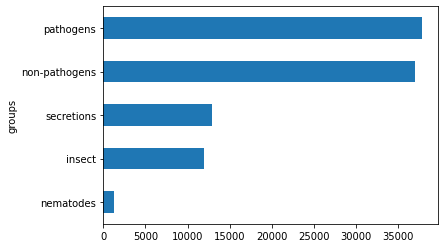

In [ ]:
groups_totals.plot(kind="barh", fontsize=10)

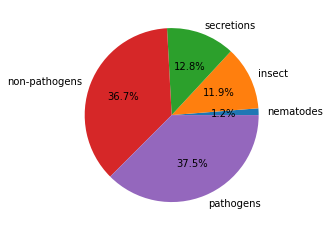

In [ ]:
groups_totals.plot(kind="pie", label="", autopct="%1.1f%%")

- Proteínas resistentes á antibióticos

In [18]:
df_ptn_resistence = pd.read_table('/content/drive/MyDrive/RaquelSerratiaDBdrive/arg_ranker/rank.results.descriptions.txt', names=['Protein', 'Frequency', 'Mechanism'])

In [ ]:
df_ptn_resistence

In [19]:
list_ptn_resistence = df_ptn_resistence['Protein'].to_list()

In [ ]:
list_ptn_resistence

In [ ]:
##df_id90_rank[df_id90_rank]isinlist_ptn_resistence
##ordenar as ptns por fenótipo
#df_bool = df_id90_rank['query'].isin(list_ptn_resistence)
df_80 = df_id80_rank[df_id80_rank['query'].isin(list_ptn_resistence)]

In [20]:
id90_ptn_r = df_id90_rank[df_id90_rank['query'].isin(list_ptn_resistence)]

In [ ]:
df_80 = df_80.drop_duplicates(subset=['query'], keep='first')

❌ Possivelmente o erro de aparecerem 47 (ao inves de 37) consiste na diferença entre id; para id>90 temso 37 proteinas resistentes, já para id>80 temos 47 proteinas resistentes


In [ ]:

len(df_80.drop_duplicates(subset=['query'], keep='first'))

47

In [21]:
len(df_id90_rank[df_id90_rank['query'].isin(list_ptn_resistence)])

37

In [ ]:
import collections
collections.Counter(list_ptn_resistence)

Counter({'WP_000018329.1': 1,
         'WP_000019304.1': 1,
         'WP_000219391.1': 1,
         'WP_000381803.1': 1,
         'WP_000442373.1': 1,
         'WP_000480968.1': 1,
         'WP_000855769.1': 1,
         'WP_001011939.1': 1,
         'WP_001043260.1': 1,
         'WP_001334766.1': 1,
         'WP_004090925.1': 1,
         'WP_004201280.1': 1,
         'WP_004953234.1': 1,
         'WP_006321188.1': 1,
         'WP_013263789.1': 1,
         'WP_032488579.1': 1,
         'WP_032489188.1': 1,
         'WP_046897272.1': 1,
         'WP_058199817.1': 1,
         'WP_070913935.1': 1,
         'WP_164054131.1': 1,
         'WP_164098268.1': 1,
         'WP_169697161.1': 1,
         'WP_174138262.1': 1,
         'WP_174138352.1': 1,
         'WP_174138520.1': 1,
         'WP_174138679.1': 1,
         'WP_182264428.1': 1,
         'WP_187433302.1': 1,
         'WP_204280443.1': 1,
         'WP_204289366.1': 1,
         'WP_204302324.1': 1,
         'WP_204348909.1': 1,
         '

In [22]:
len(list_ptn_resistence)

47

In [ ]:
id90_ptn_r = id90_ptn_r.drop_duplicates(subset=['query'], keep='first')

In [ ]:
len(id90_ptn_r)

37

In [ ]:
id90_ptn_r["Phenotype"].value_counts()

multidrug                              10
aminoglycoside                          8
unclassified                            3
trimethoprim                            3
beta-lactam                             3
fosmidomycin                            2
chloramphenicol                         2
kasugamycin                             1
sulfonamide                             1
tetracycline                            1
quinolone                               1
bacitracin                              1
macrolide-lincosamide-streptogramin     1
Name: Phenotype, dtype: int64

In [ ]:
id90_ptn_r.to_csv('id90_ptn_r.txt')

In [ ]:
del ptnr_phenotype

In [97]:
#dict_resistence_profile = id90_ptn_r.to_dict(['query', 'Phenotype'])
ptnr_phenotype = id90_ptn_r[['query', 'ARG', 'Phenotype']]
#dict(ptnr_phenotype.values)
#ptnr_phenotype = ptnr_phenotype.set_index('query')
#dictionary.to_dict(orient="index")
ptnr_phenotype.to_csv('ptnr_phenotype.txt')
ptnr_phenotype = ptnr_phenotype.sort_values(by='query')
ptnr_phenotype

,query,ARG,Phenotype
3984,WP_000018329.1,AAA88337,aminoglycoside
3760,WP_000019304.1,YP_002791405,trimethoprim
3980,WP_000219391.1,AAB03644,macrolide-lincosamide-streptogramin
2811,WP_000381803.1,CAG34229,aminoglycoside
3950,WP_000442373.1,P00383,trimethoprim
3765,WP_000480968.1,CAQ86961,aminoglycoside
3605,WP_000855769.1,GQ131574.1.gene1.p01,aminoglycoside
3982,WP_001011939.1,YP_001966224,chloramphenicol
3801,WP_001043260.1,YP_001969930,sulfonamide
3651,WP_001334766.1,AAA91586,beta-lactam


Criando lista com apenas 37 proteinas resistentes (id>90)

In [24]:
list_ptn_r_37 = ptnr_phenotype['query'].to_list()

In [98]:
phenotype_list = ptnr_phenotype['Phenotype'].to_list()

In [123]:
type(ptnr_phenotype)

pandas.core.frame.DataFrame

In [25]:
dict_ptnr_phenotype = ptnr_phenotype.set_index('query').to_dict()['Phenotype']

Ordenando o dicionario que contem protena e fenotipo, de modo que os fenotipos fiquem agrupados 

In [138]:
import operator
from collections import OrderedDict

sorted_tuples = sorted(dict_ptnr_phenotype.items(), key=operator.itemgetter(1))
print(sorted_tuples)  # [(1, 1), (3, 4), (2, 9)]

sorted_dict = OrderedDict()
for k, v in sorted_tuples:
    sorted_dict[k] = v

print(sorted_dict)  # {1: 1, 3: 4, 2: 9}

In [139]:
sorted_dict

OrderedDict([('WP_000018329.1', 'aminoglycoside'),
             ('WP_000381803.1', 'aminoglycoside'),
             ('WP_000480968.1', 'aminoglycoside'),
             ('WP_000855769.1', 'aminoglycoside'),
             ('WP_032488579.1', 'aminoglycoside'),
             ('WP_032489188.1', 'aminoglycoside'),
             ('WP_046897272.1', 'aminoglycoside'),
             ('WP_058199817.1', 'aminoglycoside'),
             ('WP_212557238.1', 'bacitracin'),
             ('WP_001334766.1', 'beta-lactam'),
             ('WP_013263789.1', 'beta-lactam'),
             ('WP_164098268.1', 'beta-lactam'),
             ('WP_001011939.1', 'chloramphenicol'),
             ('WP_169697161.1', 'chloramphenicol'),
             ('WP_212558770.1', 'fosmidomycin'),
             ('WP_212558771.1', 'fosmidomycin'),
             ('WP_212558478.1', 'kasugamycin'),
             ('WP_000219391.1', 'macrolide-lincosamide-streptogramin'),
             ('WP_164054131.1', 'multidrug'),
             ('WP_174138262.1', '

Matriz de presença para resistencia nos 316 genomas

In [140]:
import sys

orig_stdout = sys.stdout
f = open('/content/drive/MyDrive/RaquelSerratiaDBdrive/arg_ranker/matriz_a_ptn_r_37_phenotype_sorted.txt', 'w')
sys.stdout = f
#ao invés d eusar apenas a lista de 37 proteinas, usar diretamente o dict que contem as mesmas como key, e value é phenotype
for ptn_r_37,phenotype in sorted_dict.items():
  print("\t", ptn_r_37, phenotype, end='')
print()

for a in dict_all_assemblies:
  print(a, end='') #pritando os assemblies
  for ptn_r_37 in list_ptn_r_37:
    key=(a, ptn_r_37)
    if key in dict_a_ptn:
      print("\t","1",end='')
    else:
      print("\t","0",end='')
  print()  
sys.stdout = orig_stdout
f.close()

In [141]:
matriz_a_ptn_r_37_phenotype = matriz_a_ptn_r_37 = pd.read_table('/content/drive/MyDrive/RaquelSerratiaDBdrive/arg_ranker/matriz_a_ptn_r_37_phenotype_sorted.txt')
matriz_a_ptn_r_37_phenotype.rename(columns={'Unnamed: 0': 'assembly_accession'}, inplace=True)

In [142]:
matriz_a_ptn_r_37_phenotype

,assembly_accession,WP_000018329.1 aminoglycoside,WP_000381803.1 aminoglycoside,WP_000480968.1 aminoglycoside,WP_000855769.1 aminoglycoside,WP_032488579.1 aminoglycoside,WP_032489188.1 aminoglycoside,WP_046897272.1 aminoglycoside,WP_058199817.1 aminoglycoside,WP_212557238.1 bacitracin,WP_001334766.1 beta-lactam,WP_013263789.1 beta-lactam,WP_164098268.1 beta-lactam,WP_001011939.1 chloramphenicol,WP_169697161.1 chloramphenicol,WP_212558770.1 fosmidomycin,WP_212558771.1 fosmidomycin,WP_212558478.1 kasugamycin,WP_000219391.1 macrolide-lincosamide-streptogramin,WP_164054131.1 multidrug,WP_174138262.1 multidrug,WP_174138352.1 multidrug,WP_174138520.1 multidrug,WP_174138679.1 multidrug,WP_187433302.1 multidrug,WP_204289366.1 multidrug,WP_204302324.1 multidrug,WP_212558757.1 multidrug,WP_212559352.1 multidrug,WP_212559468.1 quinolone,WP_001043260.1 sulfonamide,WP_182264428.1 tetracycline,WP_000019304.1 trimethoprim,WP_000442373.1 trimethoprim,WP_004201280.1 trimethoprim,WP_004090925.1 unclassified,WP_004953234.1 unclassified,WP_006321188.1 unclassified
0,GCF_000214805.1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
1,GCF_000261045.2,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
2,GCF_000300895.1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
3,GCF_000347995.1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
4,GCF_000418815.1,0,0,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,GCF_001422575.1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
312,GCF_015548865.1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
313,GCF_000463345.2,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
314,GCF_000238975.1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


Unindo a matriz de presença das proteínas resistentes aos grupos à que pertencem cada assemcly_acession

In [143]:
from functools import reduce
two_df = [df_assemblies_names,matriz_a_ptn_r_37_phenotype]
matriz_ptnr_groups = reduce(lambda left,right: pd.merge(left,right,on='assembly_accession'), two_df)
matriz_ptnr_groups

,assembly_accession,groups,WP_000018329.1 aminoglycoside,WP_000381803.1 aminoglycoside,WP_000480968.1 aminoglycoside,WP_000855769.1 aminoglycoside,WP_032488579.1 aminoglycoside,WP_032489188.1 aminoglycoside,WP_046897272.1 aminoglycoside,WP_058199817.1 aminoglycoside,WP_212557238.1 bacitracin,WP_001334766.1 beta-lactam,WP_013263789.1 beta-lactam,WP_164098268.1 beta-lactam,WP_001011939.1 chloramphenicol,WP_169697161.1 chloramphenicol,WP_212558770.1 fosmidomycin,WP_212558771.1 fosmidomycin,WP_212558478.1 kasugamycin,WP_000219391.1 macrolide-lincosamide-streptogramin,WP_164054131.1 multidrug,WP_174138262.1 multidrug,WP_174138352.1 multidrug,WP_174138520.1 multidrug,WP_174138679.1 multidrug,WP_187433302.1 multidrug,WP_204289366.1 multidrug,WP_204302324.1 multidrug,WP_212558757.1 multidrug,WP_212559352.1 multidrug,WP_212559468.1 quinolone,WP_001043260.1 sulfonamide,WP_182264428.1 tetracycline,WP_000019304.1 trimethoprim,WP_000442373.1 trimethoprim,WP_004201280.1 trimethoprim,WP_004090925.1 unclassified,WP_004953234.1 unclassified,WP_006321188.1 unclassified
0,GCF_000257645.1,nematodes,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0
1,GCF_000738535.1,nematodes,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1
2,GCF_000738675.1,nematodes,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1
3,GCF_000747565.1,nematodes,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1
4,GCF_000214805.1,non-clinical,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,GCF_013426135.1,clinical,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
312,GCF_015645305.1,clinical,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
313,GCF_015666185.1,clinical,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1
314,GCF_017142405.1,clinical,1,1,0,0,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1


In [144]:
matriz_ptnr_groups = matriz_ptnr_groups.set_index(keys=['assembly_accession','groups'])
matriz_ptnr_groups.head()

,,WP_000018329.1 aminoglycoside,WP_000381803.1 aminoglycoside,WP_000480968.1 aminoglycoside,WP_000855769.1 aminoglycoside,WP_032488579.1 aminoglycoside,WP_032489188.1 aminoglycoside,WP_046897272.1 aminoglycoside,WP_058199817.1 aminoglycoside,WP_212557238.1 bacitracin,WP_001334766.1 beta-lactam,WP_013263789.1 beta-lactam,WP_164098268.1 beta-lactam,WP_001011939.1 chloramphenicol,WP_169697161.1 chloramphenicol,WP_212558770.1 fosmidomycin,WP_212558771.1 fosmidomycin,WP_212558478.1 kasugamycin,WP_000219391.1 macrolide-lincosamide-streptogramin,WP_164054131.1 multidrug,WP_174138262.1 multidrug,WP_174138352.1 multidrug,WP_174138520.1 multidrug,WP_174138679.1 multidrug,WP_187433302.1 multidrug,WP_204289366.1 multidrug,WP_204302324.1 multidrug,WP_212558757.1 multidrug,WP_212559352.1 multidrug,WP_212559468.1 quinolone,WP_001043260.1 sulfonamide,WP_182264428.1 tetracycline,WP_000019304.1 trimethoprim,WP_000442373.1 trimethoprim,WP_004201280.1 trimethoprim,WP_004090925.1 unclassified,WP_004953234.1 unclassified,WP_006321188.1 unclassified
assembly_accession,groups,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GCF_000257645.1,nematodes,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0
GCF_000738535.1,nematodes,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1
GCF_000738675.1,nematodes,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1
GCF_000747565.1,nematodes,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1
GCF_000214805.1,non-clinical,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1


Heatmap contendo Assembly Accession e Group, em ordem alfabética

In [145]:
matriz_ptnr_groups.sort_values(by=['groups'])

,,WP_000018329.1 aminoglycoside,WP_000381803.1 aminoglycoside,WP_000480968.1 aminoglycoside,WP_000855769.1 aminoglycoside,WP_032488579.1 aminoglycoside,WP_032489188.1 aminoglycoside,WP_046897272.1 aminoglycoside,WP_058199817.1 aminoglycoside,WP_212557238.1 bacitracin,WP_001334766.1 beta-lactam,WP_013263789.1 beta-lactam,WP_164098268.1 beta-lactam,WP_001011939.1 chloramphenicol,WP_169697161.1 chloramphenicol,WP_212558770.1 fosmidomycin,WP_212558771.1 fosmidomycin,WP_212558478.1 kasugamycin,WP_000219391.1 macrolide-lincosamide-streptogramin,WP_164054131.1 multidrug,WP_174138262.1 multidrug,WP_174138352.1 multidrug,WP_174138520.1 multidrug,WP_174138679.1 multidrug,WP_187433302.1 multidrug,WP_204289366.1 multidrug,WP_204302324.1 multidrug,WP_212558757.1 multidrug,WP_212559352.1 multidrug,WP_212559468.1 quinolone,WP_001043260.1 sulfonamide,WP_182264428.1 tetracycline,WP_000019304.1 trimethoprim,WP_000442373.1 trimethoprim,WP_004201280.1 trimethoprim,WP_004090925.1 unclassified,WP_004953234.1 unclassified,WP_006321188.1 unclassified
assembly_accession,groups,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GCF_017152795.1,clinical,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1
GCF_002920345.1,clinical,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
GCF_003402775.1,clinical,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,1,1,1,1
GCF_003401215.1,clinical,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1,1
GCF_003400615.1,clinical,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCF_016006185.1,secretions,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1
GCF_016006415.1,secretions,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1
GCF_016007235.1,secretions,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1


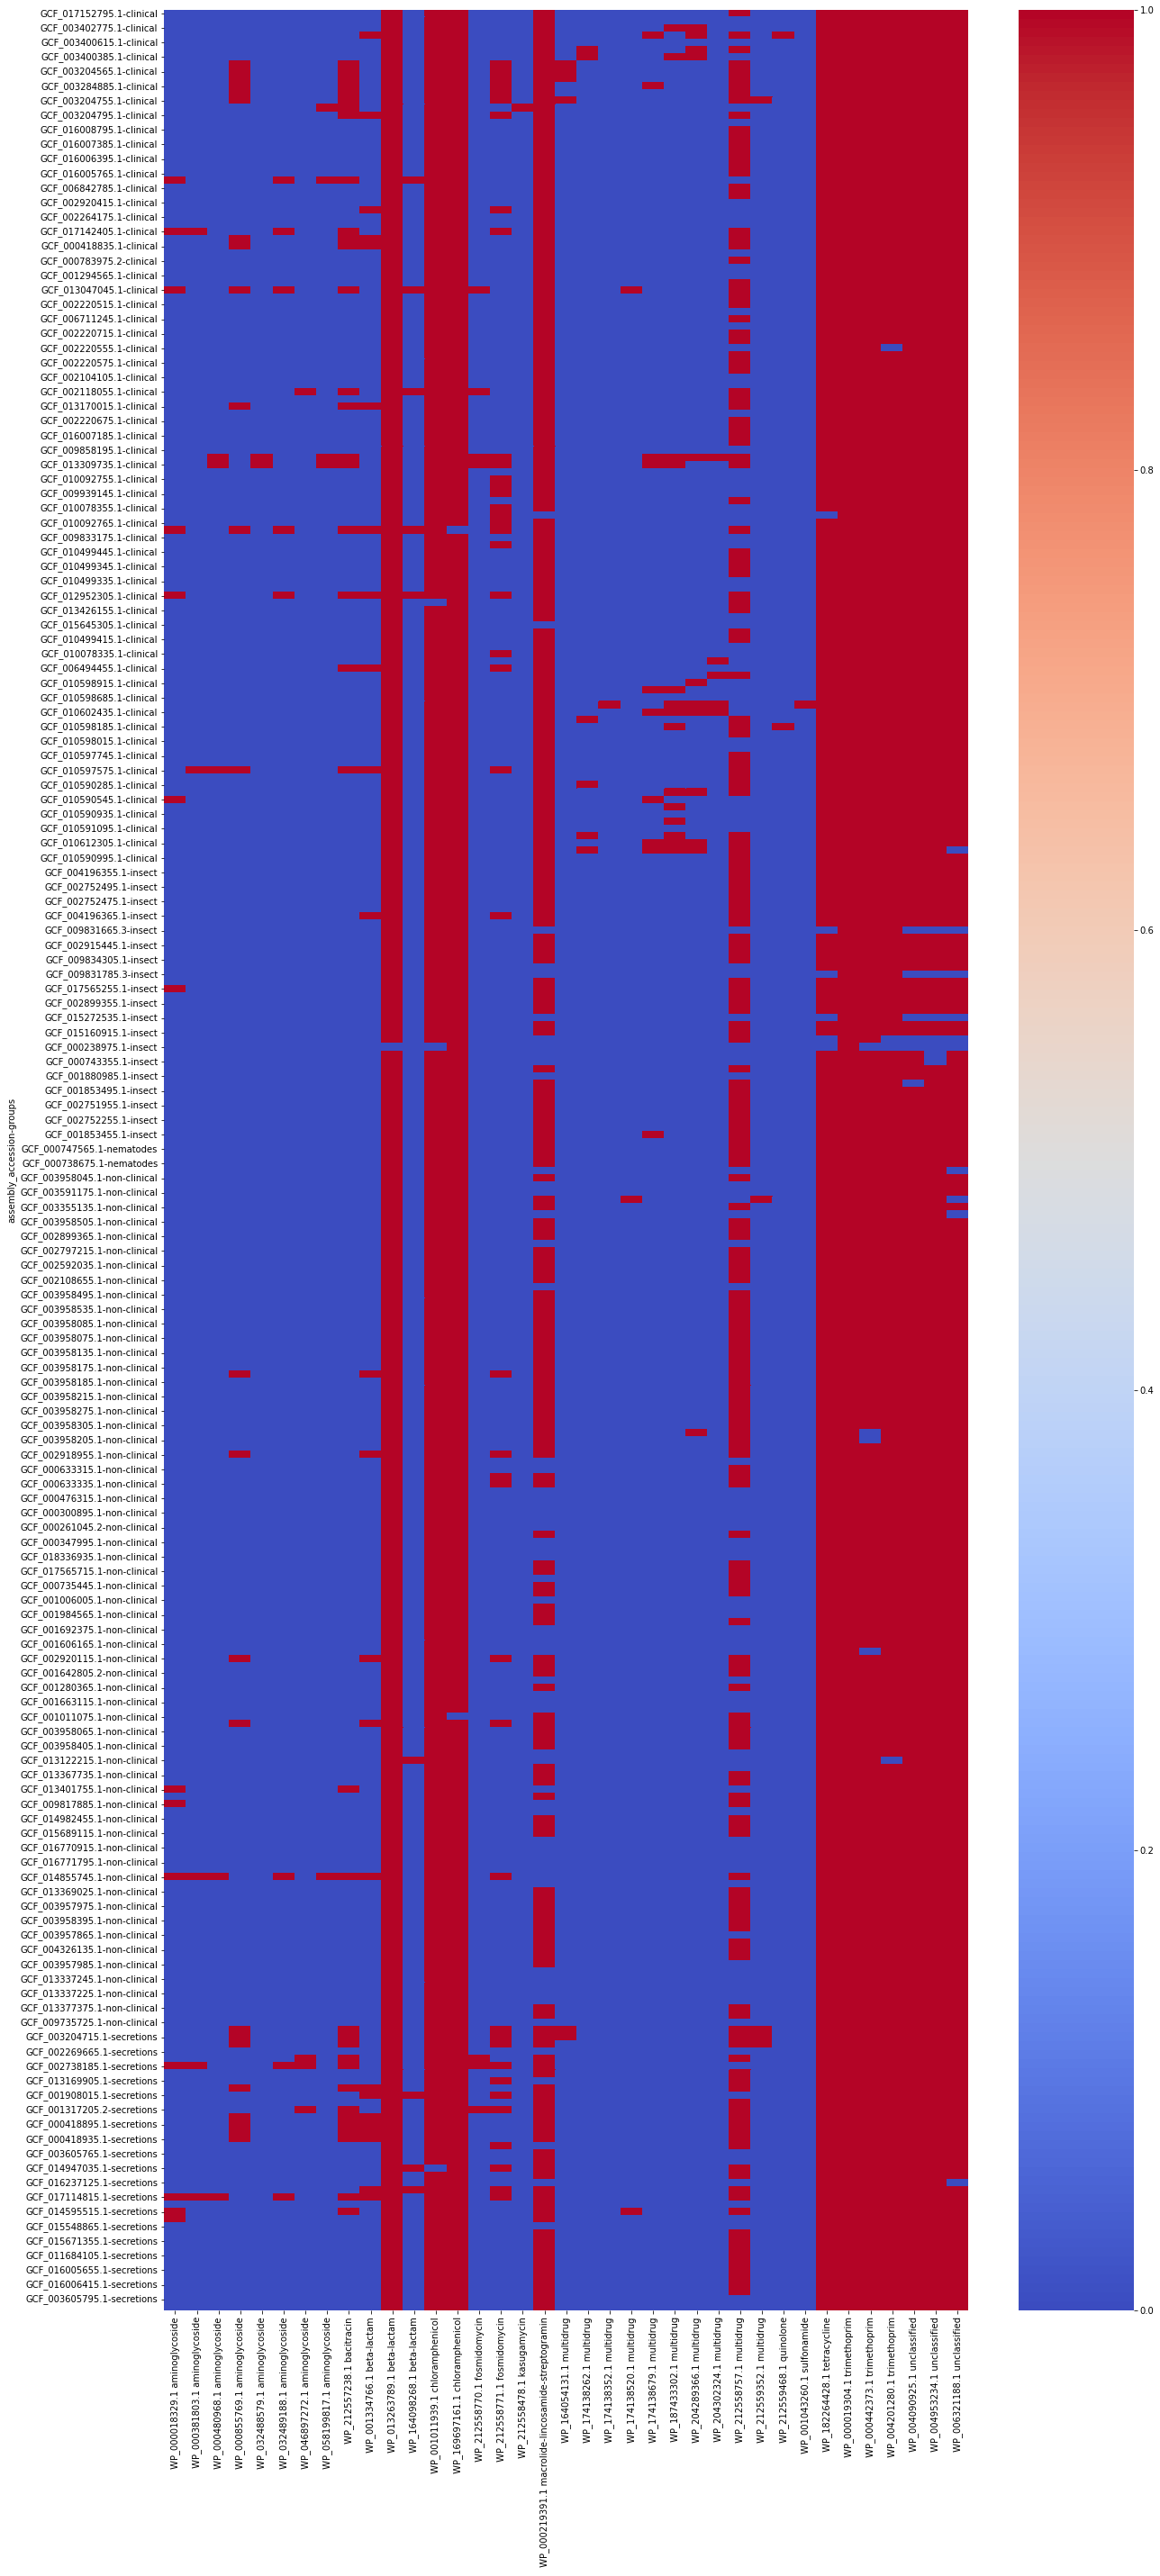

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
plt.subplots(figsize=(20,47))
#sortvalues ordena o resultado do heatmap por ordem alfabética de acordo com o grupo à que o assembly accession pertence
sns.heatmap(matriz_ptnr_groups.sort_values(by=['groups']), cmap='coolwarm')

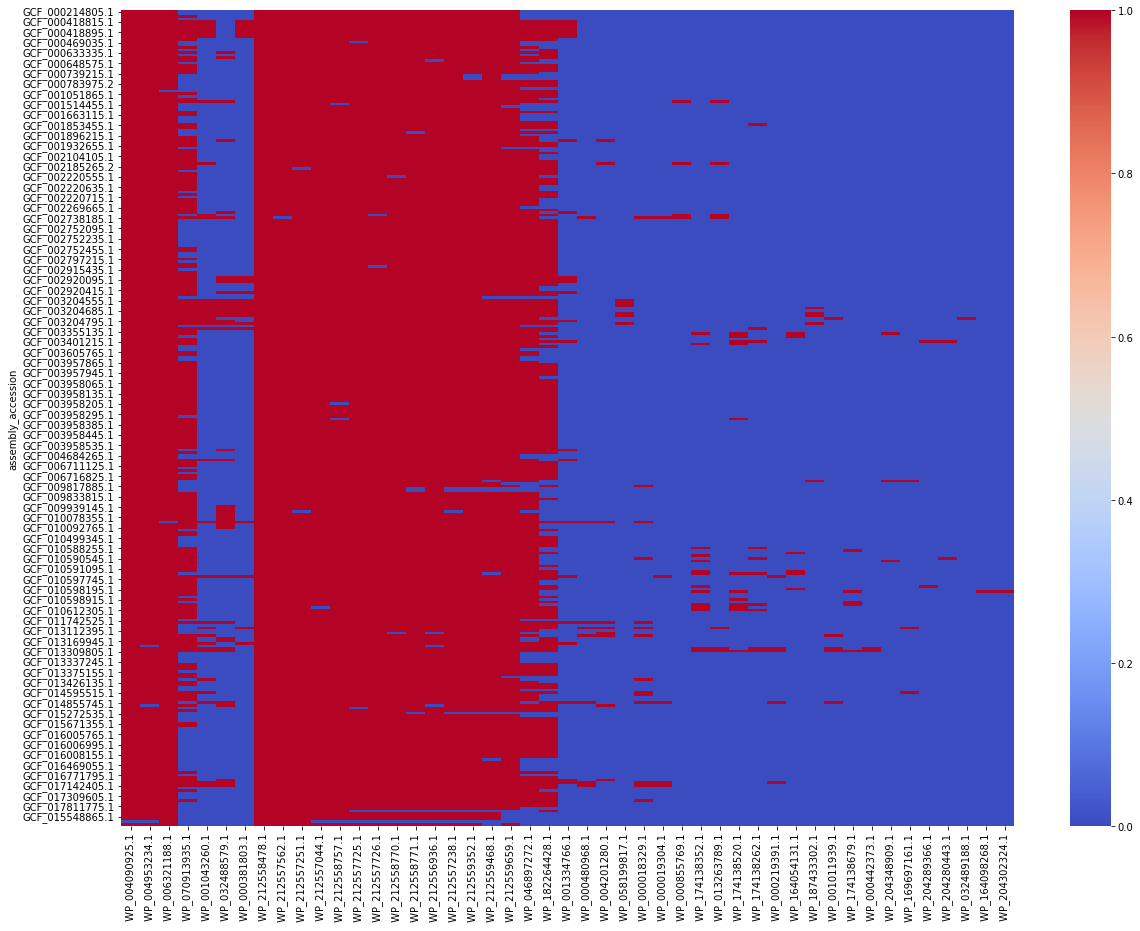

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
plt.subplots(figsize=(20,15))
sns.heatmap(matriz_a_ptn_r, cmap='coolwarm')

Frequência das proteinás com perfil de resistência à antibióticos dentre as 316 estirpes

In [ ]:
#sera usado na matriz de frequencia
import collections
freq_ptn_resistence= collections.Counter(ptn_id for item in dict_a_ptn for ptn_id in list_ptn_resistence if ptn_id == item[1])
print(freq_ptn_resistence)

Counter({'WP_212558478.1': 316, 'WP_212557562.1': 315, 'WP_004090925.1': 315, 'WP_212557251.1': 314, 'WP_006321188.1': 314, 'WP_212557044.1': 314, 'WP_004953234.1': 313, 'WP_212558757.1': 312, 'WP_212557725.1': 312, 'WP_212557726.1': 312, 'WP_212558770.1': 312, 'WP_212558771.1': 310, 'WP_212556936.1': 310, 'WP_212557238.1': 310, 'WP_212559352.1': 309, 'WP_212559468.1': 306, 'WP_212559659.1': 301, 'WP_046897272.1': 255, 'WP_182264428.1': 200, 'WP_070913935.1': 195, 'WP_032488579.1': 42, 'WP_001043260.1': 36, 'WP_001334766.1': 24, 'WP_000381803.1': 24, 'WP_000018329.1': 14, 'WP_174138352.1': 14, 'WP_174138520.1': 12, 'WP_174138262.1': 10, 'WP_004201280.1': 9, 'WP_000480968.1': 8, 'WP_013263789.1': 7, 'WP_164054131.1': 6, 'WP_058199817.1': 6, 'WP_000019304.1': 5, 'WP_187433302.1': 5, 'WP_001011939.1': 5, 'WP_174138679.1': 5, 'WP_000219391.1': 5, 'WP_000855769.1': 4, 'WP_204348909.1': 3, 'WP_169697161.1': 3, 'WP_204289366.1': 2, 'WP_204280443.1': 2, 'WP_000442373.1': 2, 'WP_032489188.1': 1

In [ ]:
sum(freq_ptn_resistence.values())

6201

Frequência proteícas (com ptns resistentes) por agrupamento

In [ ]:
import collections
freq_a_ptn_resistence= collections.Counter(item[0] for ptn_id in list_ptn_resistence for item in dict_a_ptn if ptn_id == item[1])
print(freq_a_ptn_resistence)

Counter({'GCF_013309805.1': 30, 'GCF_013309735.1': 28, 'GCF_017114815.1': 27, 'GCF_010092665.1': 26, 'GCF_010597575.1': 26, 'GCF_012952305.1': 26, 'GCF_013047045.1': 26, 'GCF_014855745.1': 26, 'GCF_002738185.1': 25, 'GCF_003204715.1': 25, 'GCF_003204755.1': 25, 'GCF_003204995.1': 25, 'GCF_003401215.1': 25, 'GCF_017142405.1': 25, 'GCF_001317205.2': 24, 'GCF_002118055.1': 24, 'GCF_003204555.1': 24, 'GCF_003204565.1': 24, 'GCF_003204635.1': 24, 'GCF_003204675.1': 24, 'GCF_003284885.1': 24, 'GCF_010598525.1': 24, 'GCF_013169055.1': 24, 'GCF_000418815.1': 23, 'GCF_000418835.1': 23, 'GCF_000418855.2': 23, 'GCF_000418875.1': 23, 'GCF_000418895.1': 23, 'GCF_000418915.1': 23, 'GCF_000418935.1': 23, 'GCF_002918955.1': 23, 'GCF_002920095.1': 23, 'GCF_002920115.1': 23, 'GCF_002935055.1': 23, 'GCF_003204685.1': 23, 'GCF_003204795.1': 23, 'GCF_003400385.1': 23, 'GCF_010602435.1': 23, 'GCF_010612305.1': 23, 'GCF_013170015.1': 23, 'GCF_014595515.1': 23, 'GCF_017114805.1': 23, 'GCF_001908015.1': 22, 'G

Matriz de frequência (Proteínas de resistência)

In [ ]:
freq_ptn_resistence.items()

dict_items([('WP_212559352.1', 309), ('WP_212557562.1', 315), ('WP_212559468.1', 306), ('WP_212558771.1', 310), ('WP_212557251.1', 314), ('WP_212558757.1', 312), ('WP_006321188.1', 314), ('WP_212557725.1', 312), ('WP_212558478.1', 316), ('WP_004090925.1', 315), ('WP_004953234.1', 313), ('WP_212557726.1', 312), ('WP_212558770.1', 312), ('WP_212557044.1', 314), ('WP_212556936.1', 310), ('WP_212557238.1', 310), ('WP_212559659.1', 301), ('WP_046897272.1', 255), ('WP_182264428.1', 200), ('WP_070913935.1', 195), ('WP_032488579.1', 42), ('WP_001043260.1', 36), ('WP_001334766.1', 24), ('WP_000381803.1', 24), ('WP_000018329.1', 14), ('WP_174138352.1', 14), ('WP_174138520.1', 12), ('WP_174138262.1', 10), ('WP_004201280.1', 9), ('WP_000480968.1', 8), ('WP_013263789.1', 7), ('WP_164054131.1', 6), ('WP_058199817.1', 6), ('WP_000019304.1', 5), ('WP_187433302.1', 5), ('WP_001011939.1', 5), ('WP_174138679.1', 5), ('WP_000219391.1', 5), ('WP_000855769.1', 4), ('WP_204348909.1', 3), ('WP_169697161.1', 3

In [ ]:
for ptn in dict_all_ptn:
  for ptn_r, v in freq_ptn_resistence.items():
    if ptn in list_ptn_resistence:
      if ptn == ptn_r:
        dict_all_ptn[ptn]=v

Contando a frequência de cada par (a,ptn_resistent)

In [ ]:
import collections
freq_a_ptn_r= collections.Counter(item for ptn_id in list_ptn_resistence for item in dict_a_ptn if ptn_id == item[1])
print(freq_a_ptn_r)

Counter({('GCF_000186485.1', 'WP_004090925.1'): 1, ('GCF_000214805.1', 'WP_004090925.1'): 1, ('GCF_000257645.1', 'WP_004090925.1'): 1, ('GCF_000261045.2', 'WP_004090925.1'): 1, ('GCF_000300895.1', 'WP_004090925.1'): 1, ('GCF_000347995.1', 'WP_004090925.1'): 1, ('GCF_000418815.1', 'WP_004090925.1'): 1, ('GCF_000418835.1', 'WP_004090925.1'): 1, ('GCF_000418855.2', 'WP_004090925.1'): 1, ('GCF_000418875.1', 'WP_004090925.1'): 1, ('GCF_000418895.1', 'WP_004090925.1'): 1, ('GCF_000418915.1', 'WP_004090925.1'): 1, ('GCF_000418935.1', 'WP_004090925.1'): 1, ('GCF_000463345.2', 'WP_004090925.1'): 1, ('GCF_000465615.2', 'WP_004090925.1'): 1, ('GCF_000469035.1', 'WP_004090925.1'): 1, ('GCF_000476315.1', 'WP_004090925.1'): 1, ('GCF_000521925.1', 'WP_004090925.1'): 1, ('GCF_000633315.1', 'WP_004090925.1'): 1, ('GCF_000633335.1', 'WP_004090925.1'): 1, ('GCF_000633355.1', 'WP_004090925.1'): 1, ('GCF_000633555.1', 'WP_004090925.1'): 1, ('GCF_000633715.1', 'WP_004090925.1'): 1, ('GCF_000648575.1', 'WP_0

In [ ]:
#verificando a soma das ocorrências de cada item (a,ptn_r)
sum(freq_a_ptn_r.values())

6201

In [ ]:
#verificando a soma de ocorrencias de cada proteinas em freq_ptn_resistence
sum(freq_ptn_resistence.values())

6201

In [ ]:
import sys

orig_stdout = sys.stdout
f = open('test.txt', 'w')
sys.stdout = f

for ptn_r in list_ptn_resistence:
  print("\t", ptn_r, end='')
print()

for a in dict_all_assemblies.keys():
  print(a, end='') #pritando os assemblies
  for ptn_r in list_ptn_resistence:
    key=(a, ptn_r)
    count = 0
    for item,v in freq_a_ptn_r.items(): 
      if key in dict_a_ptn:
        if item[1] == ptn_r:
          count = count + 1
          print("\t", count ,end='')
      else:
        print("\t","0",end='')
  print()  
sys.stdout = orig_stdout
f.close()

KeyboardInterrupt: ignored

In [ ]:
freq_a_ptn_resistence

Counter({'GCF_000186485.1': 9,
         'GCF_000214805.1': 17,
         'GCF_000238975.1': 4,
         'GCF_000257645.1': 16,
         'GCF_000261045.2': 17,
         'GCF_000300895.1': 18,
         'GCF_000347995.1': 17,
         'GCF_000418815.1': 23,
         'GCF_000418835.1': 23,
         'GCF_000418855.2': 23,
         'GCF_000418875.1': 23,
         'GCF_000418895.1': 23,
         'GCF_000418915.1': 23,
         'GCF_000418935.1': 23,
         'GCF_000463345.2': 16,
         'GCF_000465615.2': 20,
         'GCF_000469035.1': 16,
         'GCF_000476315.1': 17,
         'GCF_000521925.1': 19,
         'GCF_000633315.1': 18,
         'GCF_000633335.1': 21,
         'GCF_000633355.1': 18,
         'GCF_000633555.1': 21,
         'GCF_000633715.1': 18,
         'GCF_000648575.1': 17,
         'GCF_000735445.1': 20,
         'GCF_000738535.1': 20,
         'GCF_000738675.1': 20,
         'GCF_000739215.1': 19,
         'GCF_000743355.1': 15,
         'GCF_000743365.1': 15,
         '

In [ ]:
del df_test

In [ ]:
df_test = pd.read_table('/content/test.txt')
df_test

ParserError: ignored

In [ ]:
df_test.to_csv('teste_48.txt')

In [ ]:
##Dúvida
import sys

orig_stdout = sys.stdout
f = open('teste.txt', 'w')
sys.stdout = f

for ptn_r in list_ptn_resistence:
  print("\t", ptn_r, end='')
print()

for a in dict_all_assemblies:
  print(a, end='') #pritando os assemblies
  for ptn_r in list_ptn_resistence:
    key=(a, ptn_r)
    count = 0
    for ptn_id in list_ptn_resistence:
      if key in dict_a_ptn: 
        count = count + 1
        print("\t", count ,end='')
      else:
        print("\t","0",end='')
  print()  
sys.stdout = orig_stdout
f.close()

In [ ]:
sum(freq_ptn_resistence.values())

6201

In [ ]:
freq_ptn_resistence.values()

dict_values([309, 315, 306, 310, 314, 312, 314, 312, 316, 315, 313, 312, 312, 314, 310, 310, 301, 255, 200, 195, 42, 36, 24, 24, 14, 14, 12, 10, 9, 8, 7, 6, 6, 5, 5, 5, 5, 5, 4, 3, 3, 2, 2, 2, 1, 1, 1])

In [ ]:
del matriz_freq_ptn_res

In [ ]:
matriz_freq_ptn_res = matriz_freq_ptn_res.set_index(keys='Unnamed: 0')

Adicionando a contagem das ocorreências de proteínas resistentes à um dataframe com o nome dos agrupamentos de cada Assembly_id

In [ ]:
df_assemblies_names['freq_a_ptn_resistence'] = df_assemblies_names['assembly_accession'].map(freq_a_ptn_resistence)

In [ ]:
freq_a_ptn_resistence

In [ ]:
df_assemblies_names

,assembly_accession,groups,freq_a_ptn_resistence
0,GCF_000257645.1,nematodes,16
1,GCF_000738535.1,nematodes,20
2,GCF_000738675.1,nematodes,20
3,GCF_000747565.1,nematodes,19
4,GCF_000214805.1,non-clinical,17
...,...,...,...
311,GCF_013426135.1,clinical,19
312,GCF_015645305.1,clinical,17
313,GCF_015666185.1,clinical,19
314,GCF_017142405.1,clinical,25


Gráficos de frequência de proteínas resistentes

In [ ]:
#agrupando os dois labels
resistent_ptns = df_assemblies_names.groupby("groups")["freq_a_ptn_resistence"].sum().sort_values()

In [ ]:
resistent_ptns

groups
nematodes         75
insect           697
secretions       810
non-clinical    2208
clinical        2411
Name: freq_a_ptn_resistence, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


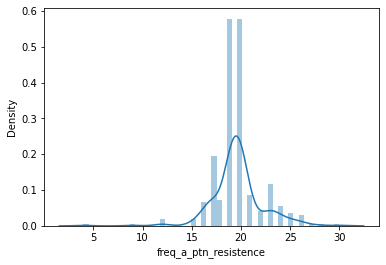

In [ ]:
sns.distplot(df_assemblies_names['freq_a_ptn_resistence'])

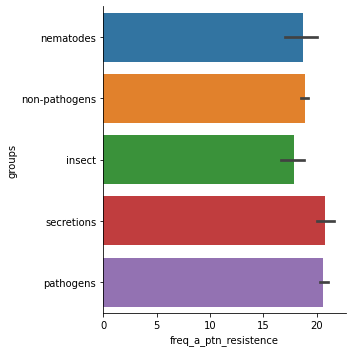

In [ ]:
sns.catplot(x="freq_a_ptn_resistence", y="groups", kind="bar", data=df_assemblies_names)

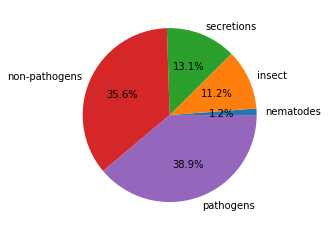

In [ ]:
resistent_ptns.plot(kind="pie", label="", autopct="%1.1f%%")

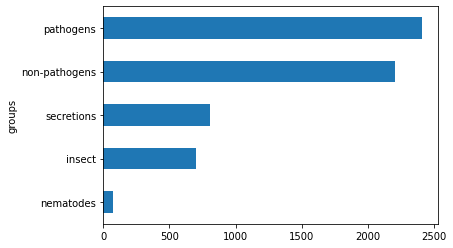

In [ ]:
resistent_ptns.plot(kind="barh", fontsize=10)

In [ ]:
sum(resistent_ptns)

6201

Heat Map

In [ ]:
df_assemblies_names #freq_a_ptn_resistence indica a frequencia de ptns resistentes a antibióticos presentes em cada assembly_id

,assembly_accession,groups,freq_a_ptn_resistence
0,GCF_000257645.1,nematodes,16
1,GCF_000738535.1,nematodes,20
2,GCF_000738675.1,nematodes,20
3,GCF_000747565.1,nematodes,19
4,GCF_000214805.1,non-pathogens,17
...,...,...,...
311,GCF_013426135.1,pathogens,19
312,GCF_015645305.1,pathogens,17
313,GCF_015666185.1,pathogens,19
314,GCF_017142405.1,pathogens,25


In [ ]:
df_assemblies_names.set_index('assembly_accession')

,groups,freq_a_ptn_resistence
assembly_accession,,
GCF_000257645.1,nematodes,16
GCF_000738535.1,nematodes,20
GCF_000738675.1,nematodes,20
GCF_000747565.1,nematodes,19
GCF_000214805.1,non-pathogens,17
...,...,...
GCF_013426135.1,pathogens,19
GCF_015645305.1,pathogens,17
GCF_015666185.1,pathogens,19


In [ ]:
import numpy as np 
from pandas import DataFrame
import seaborn as sns
%matplotlib inline
df_assemblies_names.style.background_gradient(cmap='Greens')
#sns.heatmap(df_assemblies_names['freq_a_ptn_resistence'], annot=True)

,assembly_accession,groups,freq_a_ptn_resistence
0,GCF_000257645.1,nematodes,16
1,GCF_000738535.1,nematodes,20
2,GCF_000738675.1,nematodes,20
3,GCF_000747565.1,nematodes,19
4,GCF_000214805.1,non-pathogens,17
5,GCF_000347995.1,non-pathogens,17
6,GCF_000465615.2,non-pathogens,20
7,GCF_000261045.2,non-pathogens,17
8,GCF_000463345.2,non-pathogens,16
9,GCF_000300895.1,non-pathogens,18


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 52.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 15.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 44.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


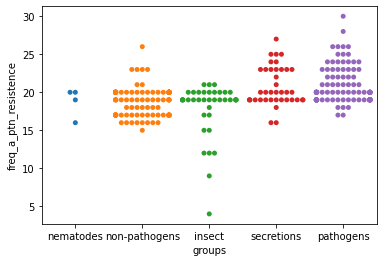

In [ ]:
sns.swarmplot(x='groups',y='freq_a_ptn_resistence',data=df_assemblies_names)

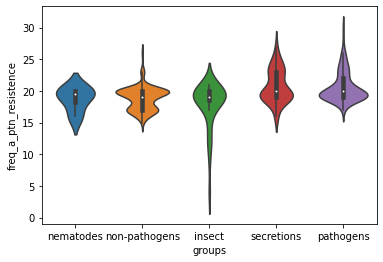

In [ ]:
sns.violinplot(x='groups',y='freq_a_ptn_resistence',data=df_assemblies_names)

In [ ]:
df_assemblies_names.head()

,assembly_accession,groups,freq_a_ptn_resistence
0,GCF_000257645.1,nematodes,16
1,GCF_000738535.1,nematodes,20
2,GCF_000738675.1,nematodes,20
3,GCF_000747565.1,nematodes,19
4,GCF_000214805.1,non-pathogens,17
